VERSION EN DESARROLLO 26-11

# Diseño de los datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import random

random.seed(2021) # fix random number generator

In [ ]:
class forward_mapping:
    """
    This class simulates the Lorenz system direct problem
    """  
    def __init__(self,sigma=10.0,rho=28.0,beta=8.0/3.0):
        self.sigma = sigma # Prandtl number
        self.rho = rho     # Rayleigh number
        self.beta = beta   # layer dimension
        self.t_iv = np.arange(0.0, 1000.0, 0.01)
        self.t_data = np.arange(0.0, 3.0, 0.1) 
        self.f_data = np.arange(0.0, 14.0, 0.1)
    
    def rhs(self,w,t):
        """
        Evaluate right hand side of the Lorenz system
        """
        return [self.sigma*(w[1] - w[0]),
                w[0]*(self.rho - w[2]) - w[1],
                w[0]*w[1] - self.beta*w[2]]

    def jac(self,w,t):
        """
        Evaluate Jacobian of the Lorenz system right hand side
        """
        return [[-self.sigma,self.sigma,0],
                [self.rho-w[2],-1,-w[0]],
                [w[1],w[0],-self.beta]]

    def get_iv(self):
        """
        Get an initial value that lies on the attractor
        """
        x0 = [1,1,1]
        return integrate.odeint(self.rhs,x0,self.t_iv,Dfun=self.jac)[-1,:]
    
    def simulate(self,p):
        """
        Simulate from the initial value problem
        """
        soln = integrate.odeint(self.rhs,p,self.t_data,Dfun=self.jac)
        return soln    

    def make_data(self):
        """
        Generate data
        """
        self.iv = self.get_iv()
        soln = integrate.odeint(self.rhs,self.iv,self.f_data,Dfun=self.jac)
        self.std = soln.max(axis=0)/10.0**2
        soln += self.std*np.random.randn(140,3)
        return soln
    
    def future_data(self):
        """
        Generate future data for comparison
        """
        self.iv = self.get_iv()
        soln = integrate.odeint(self.rhs,self.iv,self.f_data,Dfun=self.jac)
        self.std = soln.max(axis=0)/10.0**2
        soln += self.std*np.random.randn(140,3)
        return soln

    def make_future_data(self, p, t_i, t_f):
        """
        Generate future data for comparison
        """
        x0 = p
        soln = integrate.odeint(self.rhs,x0,self.f_data,Dfun=self.jac)[t_i:t_f,:]
        return soln

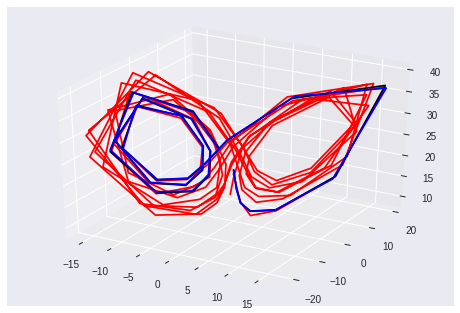

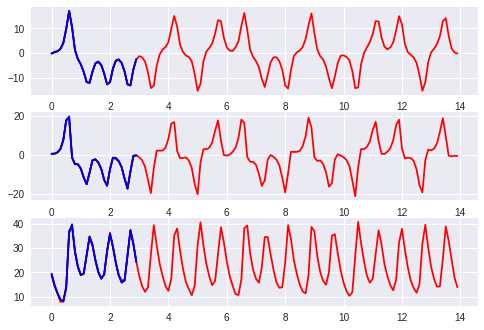

<Figure size 576x396 with 0 Axes>

In [ ]:
if __name__ == "__main__":
    
    fm = forward_mapping() #initialize class
    data = fm.make_data()  # make synthetic data
    true_p = fm.get_iv()   # get the true initial value 
    soln = fm.simulate(true_p) # solve the ivp for the true value
    random_p = true_p+10**-2*np.random.randn(3) # random perturbation of iv
    random_soln = fm.simulate(random_p) # solve the ivp for the perturbed iv    
    ax = plt.figure().add_subplot(projection='3d')
    fig, axs = plt.subplots(3)         
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    ax.plot(random_soln[:, 0], random_soln[:, 1], random_soln[:, 2],'b') #perturbed       
    axs[0].plot(fm.f_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')    
    axs[0].plot(fm.t_data,random_soln[:,0],'b')        
    axs[1].plot(fm.f_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[1].plot(fm.t_data,random_soln[:,1],'b')        
    axs[2].plot(fm.f_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    axs[2].plot(fm.t_data,random_soln[:,2],'b')        
    plt.show()
    plt.savefig('DiseñoDatos_V1.png')


In [ ]:
print(data[40,:])

[ 4.32407969  8.18112241 12.37520205]


In [ ]:
print(data[20,:])

[-11.70036548  -7.26910122  36.37569308]


In [ ]:
print(true_p)

[-0.22645953  0.60372242 19.37593389]


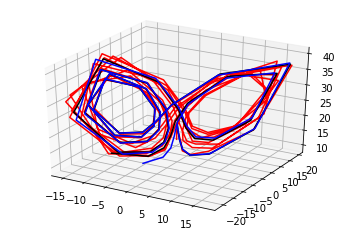

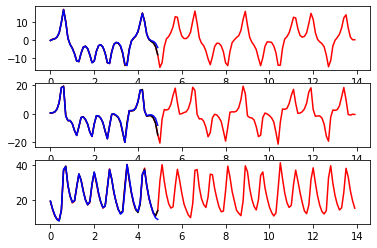

In [ ]:
if __name__ == "__main__":
    
    fm = forward_mapping() #initialize class
    data = fm.future_data()  # make synthetic future data
    true_p = fm.get_iv()   # get the true initial value 
    #soln = fm.simulate(true_p) # solve the ivp for the true value
    #random_p = true_p+10**-2*np.random.randn(3) # random perturbation of iv
    #random_soln = fm.simulate(random_p) # solve the ivp for the perturbed iv    
    ax = plt.figure().add_subplot(projection='3d')
    fig, axs = plt.subplots(3)         
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    ax.plot(random_soln[:, 0], random_soln[:, 1], random_soln[:, 2],'b') #perturbed       
    axs[0].plot(fm.f_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')    
    axs[0].plot(fm.t_data,random_soln[:,0],'b')        
    axs[1].plot(fm.f_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[1].plot(fm.t_data,random_soln[:,1],'b')        
    axs[2].plot(fm.f_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    axs[2].plot(fm.t_data,random_soln[:,2],'b')        
    plt.show()


In [ ]:
print(true_p)

[-0.22645953  0.60372242 19.37593389]


# Requisitos


In [ ]:
!pip install corner
import corner 

In [ ]:
#import pytwalk
from scipy import integrate
from xlrd import open_workbook
import scipy.stats as ss
import numpy as np
import scipy as sp
import random
#import corner
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pylab as pl
from numpy.random import uniform, normal
from numpy import ones, zeros, cumsum, shape, mat, cov, mean, ceil, matrix, sqrt
from numpy import floor, exp, log, sum, pi, savetxt, loadtxt, array
from time import time, localtime, strftime
from pylab import plot, hist, xlabel, ylabel, title
# WARNING: pylab module not available, Ana, TS and Hist methods will fail.")
from scipy import integrate, optimize


In [ ]:
## square of the norm.
def SqrNorm(x):
    return sum(x*x) 

log2pi = log(2*pi)
log3 = log(3.0)

def Remain( Tr, it, sec1, sec2):
    """ Remaining time Information messages:
        total iterations Tr, current it, start time, current time, as returned by time() (floats)."""

    # how many seconds remaining
    ax = int( (Tr - it) *  ((sec2 - sec1)/it) )


    if (ax < 1):

        return " "

    if (ax < 60):

        return "Finish in approx. %d sec." % (ax,)

    if (ax <= 360):

        return "Finish in approx. %d min and %d sec." % ( ax // 60, ax % 60)

    if (ax > 360):

        ax += sec2  # current time plus seconds remaining=end time
        return "Finish by " + strftime("%a, %d %b %Y, %H:%M.", localtime(ax))


## Pytwalk

In [ ]:
class pytwalk:
    """This is the t-walk class.

    Initiates defining the dimension n, Supp= defines the support
    returns True if x within the support and False otherwise,
    and U= -log of the objective function, eg:

    Mytwalk = pytwalk( n=3, U=MyMinusLogf, Supp=MySupportFunction).

    or
    
    t positive, u= -log likelihood and w= -log prior 

    Mytwalk = pytwalk( n=3, t=0.5, u=MyMinusLoglikelihood, w=MyMinusLogPrior, Supp=MySupportFunction).

    In this case the objective function is U= t*u + w and u, for x (not xp)
    is saved in self.Output_u.  This is a backwards compatible implementation for
    penilized likelihood for thermodynamicl integral to estimate
    normalizing constants.

    Then do: Mytwalk.Run?

    Other parameter are:
    ww= the prob. of choosing each kernel, aw, at, n1phi (see inside twalk.py)
    with default values as in the paper, normally NOT needed to be changed."""

    def __init__( self, n, U=(lambda x: sum(0.5*x**2)), Supp=(lambda x: True),
        t=-1, u=(lambda x: sum(0.5*x**2)), w=(lambda x: 0.0),
        ww=[0.0000, 0.4918, 0.4918, 0.0082 + 0.0082, 0.0], aw=1.5, at=6.0, n1phi=4.0):
        ### Careful the Hop move does not work!!
        self.n = n
        self.t = t
        if self.t >= 0: ### Penilized likelihood
            self.LikelihoodEnergy = u
            self.PriorEnergy = w
            self.Output_u = array([0.0])
        else:  ### Usual case
            self.PriorEnergy = (lambda x: 0.0) 
            self.LikelihoodEnergy = U
            self.t = 1.0
        self.U = (lambda x: self.Energy(x))
        self.Supp = Supp
        self.Output = zeros((1, n+1)) ### No data (MCMC output) yet
        self.Output_u = array([0.0]) ### To save ll_e, the likelihood energy
        self.T = 1
        self.Acc = zeros(6)  ### To save the acceptance rates of each kernel, and the global acc. rate

        #### Kernel probabilities
        self.Fw = cumsum(ww)
        
        #### Parameters for the propolsals
        self.aw = aw  ### For the walk move
        self.at = at ### For the Traverse move

        #n1phi = 5 ### expected value of parameters to move
        self.pphi = min( n, n1phi)/(1.0*n) ### Prob. of choosing each par.
        
        self.WAIT = 30

    def Energy( self, x):
        self.ll_e = self.LikelihoodEnergy(x)
        self.prior_e = self.PriorEnergy(x)
        return self.t*self.ll_e + self.prior_e

    def _SetUpInitialValues( self, x0, xp0):
        """Private method."""

        ### Check x0 and xp0 in the support

        if any(abs(x0 -xp0) <= 0):
            print("pytwalk: ERROR, not all entries of initial values different.")
            return [ False, 0.0, 0.0]

        if not(self.Supp(x0)):
            print("pytwalk: ERROR, initial point x0 out of support.")
            return [ False, 0.0, 0.0]
        u = self.U(x0)

        if not(self.Supp(xp0)):
            print("pytwalk: ERROR, initial point xp0 out of support.")
            return [ False, u, 0.0]
        up = self.U(xp0)
        
        return [ True, u, up]



    def Run( self, T, x0, xp0, t=1):
        """Run the twalk.
        
           Run( T, x0, xp0),
           T = Number of iterations.
           x0, xp0, two initial points within the support,
           ***each entry of x0 and xp0 most be different***. 
        """
        
        self.t = t

        sec = time()
        print("pytwalk: Running the twalk with %d iterations"\
            % (T,), end=' ')
        if self.t == 1:
            print(". ",  strftime("%a, %d %b %Y, %H:%M:%S.", localtime(sec)))
        else:
            print(" (%f). " % (self.t,), strftime("%a, %d %b %Y, %H:%M:%S.", localtime(sec)))

        ### Check x0 and xp0 are in the support
        [ rt, u, up] = self._SetUpInitialValues( x0, xp0)

        if (not(rt)):
            return 0
        

        ### send an estimation for the duration of the sampling if 
        ### evaluating the ob. func. twice (in self._SetUpInitialValues) takes more than one second

        sec2 = time() # last time we sent a message
        print("       " + Remain( T, 2, sec, sec2))

        x = x0     ### Use x and xp by reference, so we can retrive the last values used
        xp = xp0

        ### Set the array to place the iterations and the U's ... we donot save up's
        self.Output = zeros((T+1, self.n+1))
        self.Output_u = zeros(T+1)
        self.T = T+1
        self.Acc = zeros(6)
        kercall = zeros(6) ## Times each kernel is called

        
        self.Output[ 0, 0:self.n] = x.copy()
        self.Output[ 0, self.n] = u
        self.Output_u[0] = self.ll_e

        j1=1
        j=0

        ### Sampling  
        for it in range(T):
            y, yp, ke, A, u_prop, up_prop = self.onemove( x, u, xp, up)

            kercall[ke] += 1
            kercall[5] += 1 
            if (uniform() < A):  
                x = y.copy()   ### Accept the propolsal y
                u = u_prop
                xp = yp.copy()   ### Accept the propolsal yp
                up = up_prop
                
                self.Acc[ke] += 1
                self.Acc[5] += 1


            ### To retrive the current values
            self.x = x
            self.xp = xp
            self.u = u
            self.up = up

            self.Output[it+1,0:self.n] = x.copy()
            self.Output[it+1,self.n] = u
            self.Output_u[it+1] = self.ll_e

            ### Estimate the remaing time, every 2**j1 iterations
            if ((it % (1 << j1)) == 0):

                j1 += 1
                j1 = min( j1, 10)  # check the time at least every 2^10=1024 iterations
                ax = time()
                if ((ax - sec2) > (1 << j)*self.WAIT): # Print an estimation every WAIT*2**j 

                    print("pytwalk: %10d iterations so far. " % (it,) + Remain( T, it, sec, ax))
                    sec2 = ax
                    j += 1
                    j1 -= 1 # check the time as often 
        
        if (self.Acc[5] == 0):
            print("pytwalk: WARNING,  all propolsals were rejected!")
            print(strftime("%a, %d %b %Y, %H:%M:%S.", localtime(time())))
            return 0
        else:
            print("pytwalk: finished, " + strftime("%a, %d %b %Y, %H:%M:%S.", localtime(time())))

        for i in range(6):
            if kercall[i] != 0:
                self.Acc[i] /= kercall[i]
        return 1


    def  onemove( self, x, u, xp, up):
        """One move of the twalk.  This is basically the raw twalk kernel.
           It is usefull if the twalk is needed inside a more complex MCMC.
        
           onemove(x, u, xp, up),
           x, xp, two points WITHIN the support ***each entry of x0 and xp0 must be different***.
           and the value of the objective at x, and xp
           u=U(x), up=U(xp).
           
           It returns: [y, yp, ke, A, u_prop, up_prop]
           y, yp: the proposed jump
           ke: The kernel used, 0=nothing, 1=Walk, 2=Traverse, 3=Blow, 4=Hop
           A: the M-H ratio
           u_prop, up_prop: The values for the objective func. at the proposed jumps 
        """

        #### Make local references for less writing
        n = self.n
        U = self.U
        Supp = self.Supp
        Fw = self.Fw
        
        ker = uniform() ### To choose the kernel to be used
        ke = 1
        A = 0
        
        ## Kernel nothing exchange x with xp, not used
        if ((0.0 <= ker) & (ker < Fw[0])): 
            ke = 0
            y = xp.copy()
            up_prop = u
            yp = x.copy()
            u_prop = up
            ### A is the MH acceptance ratio
            A = 1.0;  #always accepted


        ## The Walk move
        if ((Fw[0] <= ker) & (ker < Fw[1])):
            
            ke = 1

            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
        
                yp = self.SimWalk( xp, x)

                y = x.copy()
                u_prop = u

                if ((Supp(yp)) & (all(abs(yp - y) > 0))):
                    up_prop = U(yp)
                    A = exp(up - up_prop)
                else:
                    up_prop = None
                    A = 0; ##out of support, not accepted
                        
            else:  ## xp as pivot

                y = self.SimWalk( x, xp)

                yp = xp.copy()
                up_prop = up

                if ((Supp(y)) & (all(abs(yp - y) > 0))):
                    u_prop = U(y)
                    A = exp(u - u_prop)
                else:
                    u_prop = None
                    A = 0; ##out of support, not accepted


        #### The Traverse move
        if ((Fw[1] <= ker) & (ker < Fw[2])):

            ke = 2
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot

                beta = self.Simbeta()
                yp = self.SimTraverse( xp, x, beta)

                y = x.copy()
                u_prop = u
                
                if Supp(yp):                
                    up_prop = U(yp)
                    if (self.nphi == 0):
                        A = 1 ###Nothing moved
                    else:
                        A = exp((up - up_prop) +  (self.nphi-2)*log(beta))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:            ## xp as pivot

                beta = self.Simbeta()
                y = self.SimTraverse( x, xp, beta)

                yp = xp.copy()
                up_prop = up

                if Supp(y):
                    u_prop = U(y)
                    if (self.nphi == 0):
                        A = 1 ###Nothing moved
                    else:
                        A = exp((u - u_prop) +  (self.nphi-2)*log(beta))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted

        ### The Blow move
        if ((Fw[2] <= ker) & (ker < Fw[3])): 

            ke = 3
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
                yp = self.SimBlow( xp, x)
                
                y = x.copy()
                u_prop = u
                if ((Supp(yp)) & all(yp != x)):
                    up_prop = U(yp)
                    W1 = self.GBlowU( yp, xp,  x)
                    W2 = self.GBlowU( xp, yp,  x) 
                    A = exp((up - up_prop) + (W1 - W2))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:  ## xp as pivot
                y = self.SimBlow( x, xp)

                yp = xp.copy()
                up_prop = up
                if ((Supp(y)) & all(y != xp)):
                    u_prop = U(y)
                    W1 = self.GBlowU(  y,  x, xp)
                    W2 = self.GBlowU(  x,  y, xp)
                    A = exp((u - u_prop) + (W1 - W2))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted
        

        ### The Hop move
        if ((Fw[3] <= ker) & (ker < Fw[4])): 

            ke = 4
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
                yp = self.SimHop( xp, x)
                
                y = x.copy()
                u_prop = u
                if ((Supp(yp)) & all(yp != x)):
                    up_prop = U(yp)
                    W1 = self.GHopU( yp, xp,  x)
                    W2 = self.GHopU( xp, yp,  x) 
                    A = exp((up - up_prop) + (W1 - W2))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:  ## xp as pivot
                y = self.SimHop( x, xp)

                yp = xp.copy()
                up_prop = up
                if ((Supp(y)) & all(y != xp)):
                    u_prop = U(y)
                    W1 = self.GHopU(  y,  x, xp)
                    W2 = self.GHopU(  x,  y, xp)
                    A = exp((u - u_prop) + (W1 - W2))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted
        
        return [y, yp, ke, A, u_prop, up_prop]



#################################################################################
##### Auxiliars for the kernels

    ### Used by the Walk kernel
    def SimWalk( self, x, xp):
        aw = self.aw
        n = self.n
        
        phi = (uniform(size=n) < self.pphi) ### parametrs to move
        self.nphi = sum(phi)
        z = zeros(n)

        for i in range(n):
            if phi[i]:
                u = uniform()
                z[i] = (aw/(1+aw))*(aw*u**2.0 + 2.0*u - 1.0)

        return x + (x - xp)*z

    #### Used by the Traverse kernel
    def Simbeta(self):
        at = self.at
        if (uniform() < (at-1.0)/(2.0*at)):
            return exp(1.0/(at+1.0)*log(uniform()))
        else:
            return exp(1.0/(1.0-at)*log(uniform()))

    def SimTraverse( self,  x, xp, beta):
        n = self.n
    
        phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(phi)

        rt = x.copy()
        for i in range(n):
            if (phi[i]):
                rt[i] = xp[i] + beta*(xp[i] - x[i])
            
        return rt


    ### Used by the Blow kernel
    def SimBlow( self, x, xp):
        n = self.n
    
        self.phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(self.phi)
    
        self.sigma = max(self.phi*abs(xp - x))

        rt = x.copy()
        for i in range(n):
            if (self.phi[i]):
                rt[i] = xp[i] + self.sigma * normal()
            
        return rt


    def GBlowU( self, h, x, xp):
        nphi = self.nphi
        self.sigma = max(self.phi*abs(xp - x)) #recalculate sigma, but same phi    
        if (nphi > 0):
            return (nphi/2.0)*log2pi + nphi*log(self.sigma) + 0.5*SqrNorm(h - xp)/(self.sigma**2)
        else:
            return 0


    ### Used by the Hop kernel
    def SimHop( self, x, xp):
        n = self.n
    
        self.phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(self.phi)
    
        self.sigma = max(self.phi*abs(xp - x))/3.0

        rt = x.copy()
        for i in range(n):
            if (self.phi[i]): 
                rt[i] = x[i] + self.sigma * normal()

        return rt


    def GHopU( self, h, x, xp): ## It is actually equal to GBlowU!
        nphi = self.nphi
        self.sigma = max(self.phi*abs(xp - x))/3.0 ##Recalculate sigma, but same phi

        if (nphi > 0):
            return (nphi/2.0)*log2pi + nphi*log(self.sigma) + 0.5*SqrNorm(h - xp)/(self.sigma**2)
        else:
            return 0



#################################################################################
#####  Output analysis auxiliar methods

    def IAT( self, par=-1, start=0, end=0, maxlag=0):
        """Calculate the Integrated Autocorrelation Times of parameters par
           the default value par=-1 is for the IAT of the U's"""
        if (end == 0):
            end = self.T

        if (self.Acc[5] == 0):
            print("twalk: IAT: WARNING,  all propolsals were rejected!")
            print("twalk: IAT: Cannot calculate IAT, fixing it to the sample size.")
            return self.T

        iat = IAT( self.Output, cols=par, maxlag=maxlag, start=start, end=end)
        
        return iat
    

    def TS( self, par=-1, start=0, end=0):
        """Plot time sries of parameter par (defualt = log f) etc."""
        if par == -1:
            par = self.n
        
        if (end == 0):
            end = self.T

        if (par == self.n):
            plot( list(range( start, end)), -1*self.Output[ start:end, par])
            ylabel("Log of Objective")
        else:
            plot( list(range( start, end)), self.Output[ start:end, par])
            ylabel("Parameter %d" % par)
        xlabel("Iteration")


    def Ana( self, par=-1, start=0, end=0):
        """Output Analysis, TS plots, accepatnce rates, IAT etc."""
        if par == -1:
            par = self.n

        if (end == 0):
            end = self.T

        print("Acceptance rates for the Walk, Traverse, Blow and Hop kernels:" + str(self.Acc[1:5]))
        print("Global acceptance rate: %7.5f" % self.Acc[5])
        
        iat = self.IAT( par=par, start=start, end=end)
        print("Integrated Autocorrelation Time: %7.1f, IAT/n: %7.1f" % (iat, iat/self.n))
        
        self.TS( par=par, start=start, end=end)
        
        return iat


    def Hist( self, par=-1, start=0, end=0, g=(lambda x: x[0]), xlab=None, bins=20, density=False):
        """Basic histigrams and output analysis.  If par=-1, use g.
           The function g provides a transformation to be applied to the data,
           eg g=(lambda x: abs(x[0]-x[1]) would plot a histogram of the distance
           between parameters 0 and 1, etc."""

        if (end == 0):
            end = self.T

        if (par == -1):
            ser = zeros(end-start)
            for it in range(end-start):
                ser[it] = g(self.Output[ it+start, :-1])
            if (xlab == None):
                xlab = "g"
        else:
            ser = self.Output[ start:end, par]
            if (xlab == None):
                xlab = "parameter %d" % (par,)
            
        xlabel(xlab)
        print("Mean for %s= %f" % ( xlab, mean(ser)))
        return hist( ser, bins=bins, density=density)



    def Save( self, fnam, start=0, end=-1, thin=1):
        """Saves the Output as a text file, starting at start (burn in), with thinning (thin)."""

        print("Saving output, all pars. plus the U's in file", fnam)
        
        savetxt( fnam, self.Output[ start:end:thin,:])



    def Load( self, fnam, start=0, thin=1):
        """Loads the Output from a text file, typically written with the Save method.
           It will overwrite any other twalk output.  Updates the dimension n and the sample size T."""
        
        print("Loading output from file", fnam)
        
        self.Output = loadtxt(fnam)
        self.T, self.n = self.Output.shape
        self.n -= 1

        
##### A simple Random Walk M-H
    def RunRWMH( self, T, x0, sigma):
        """Run a simple Random Walk M-H"""

        sec = time() # last time we sent a message
        print("pytwalk: This is the Random Walk M-H running with %d iterations." % T)
        ### Local variables
        x = x0.copy()
        if not(self.Supp(x)):
            print("pytwalk: ERROR, initial point x0 out of support.")
            return 0
        self.T = T

        u = self.U(x)
        n = self.n

        sec2 = time() # last time we sent a message
        print("       " + Remain( T, 2, sec, sec2))

        ### Set the array to place the iterations and the U's
        self.Output = zeros((T+1, n+1))
        self.Acc = zeros(6)
                
        #### Make local references for less writing
        Output = self.Output
        U = self.U
        Supp = self.Supp
        Acc = self.Acc
        
        Output[ 0, 0:n] = x.copy()
        Output[ 0, n] = u

        j1=1
        j=0

        y = x.copy()
        for it in range(T):
            y = x + normal(size=n)*sigma ### each entry with sigma[i] variance 
            if Supp(y):        ### If it is within the support of the objective
                uprop = U(y)   ### Evaluate the objective
                if (uniform() < exp(u-uprop)):  
                    x = y.copy()   ### Accept the propolsal y
                    u = uprop
                    Acc[5] += 1

            ### Estimate the remaing time, every 2**j1 iterations
            if ((it % (1 << j1)) == 0):

                j1 += 1
                j1 = min( j1, 10)  # check the time at least every 2^10=1024 iterations
                ax = time()
                if ((ax - sec2) > (1 << j)*self.WAIT): # Print an estimation every WAIT*2**j 
                    print("pytwalk: %10d iterations so far. " % (it,) + Remain( T, it, sec, ax))
                    sec2 = ax
                    j += 1
                    j1 -= 1 # check the time as often 

            Output[it+1,0:n] = x
            Output[it+1,n] = u
        
        if (Acc[5] == 0):
            print("pytwalk: WARNING,  all propolsals were rejected!")
            return 0

        Acc[5] /= T;
        return 1




############################################################################################
#### Auxiliary functions to calculate Integrated autocorrelation times of a time series 


####  Calculates an autocovariance 2x2 matrix at lag l in column c of matrix Ser with T rows
####  The variances of each series are in the diagonal and the (auto)covariance in the off diag.
def AutoCov( Ser, c, la, T=0):
    if (T == 0):
        T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    return cov( Ser[0:(T-1-la), c], Ser[la:(T-1), c], bias=1)
    
    
    

#### Calculates the autocorrelation from lag 0 to lag la of columns cols (list)
#### for matrix Ser
def AutoCorr( Ser, cols=0, la=1):
    T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    ncols = shape(mat(cols))[1] ## Number of columns to analyse (parameters)

    #if ncols == 1:
    #    cols = [cols]
        
    ### Matrix to hold output
    Out = matrix(ones((la+1)*ncols)).reshape( la+1, ncols)
        
    for c in range(ncols):
        for l in range( 1, la+1):  
            Co = AutoCov( Ser, cols[c], l, T) 
            Out[l,c] = Co[0,1]/(sqrt(Co[0,0]*Co[1,1]))
    
    return Out
    

### Makes an upper band matrix of ones, to add the autocorrelation matrix
### gamma = auto[2*m+1,c]+auto[2*m+2,c] etc. 
### MakeSumMat(lag) * AutoCorr( Ser, cols=c, la=lag) to make the gamma matrix
def MakeSumMat(lag):
    rows = (lag)//2   ### Integer division!
    Out = mat(zeros([rows,lag], dtype=int))
    
    for i in range(rows): 
        Out[i,2*i] = 1
        Out[i,2*i+1] = 1
    
    return Out


### Finds the cutting time, when the gammas become negative
def Cutts(Gamma):
    cols = shape(Gamma)[1]
    rows = shape(Gamma)[0]
    Out = mat(zeros([1,cols], dtype=int))
    Stop = mat(zeros([1,cols], dtype=bool))
    
    if (rows == 1):
        return Out
        
    i = 0
    ###while (not(all(Stop)) & (i < (rows-1))):
    for i in range(rows-1):
        for j in range(cols):  ### while Gamma stays positive and decreasing
            if (((Gamma[i+1,j] > 0.0) & (Gamma[i+1,j] < Gamma[i,j])) & (not Stop[0,j])):
                Out[0,j] = i+1 ## the cutting time for colomn j is i+i
            else:
                Stop[0,j] = True
        i += 1
    
    
    return Out


####  Automatically find a maxlag for IAT calculations
def AutoMaxlag( Ser, c, rholimit=0.05, maxmaxlag=20000):
    Co = AutoCov( Ser, c, la=1)
    rho = Co[0,1]/Co[0,0]  ### lag one autocorrelation
    
    ### if autocorrelation is like exp(- lag/lam) then, for lag = 1
    lam = -1.0/log(abs(rho)) 
    
    ### Our initial guess for maxlag is 1.5 times lam (eg. three times the mean life)
    maxlag = int(floor(3.0*lam))+1
    
    ### We take 1% of lam to jump forward and look for the
    ### rholimit threshold
    jmp = int(ceil(0.01*lam)) + 1
    
    T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    while ((abs(rho) > rholimit) & (maxlag < min(T//2,maxmaxlag))):
        Co = AutoCov( Ser, c, la=maxlag)
        rho = Co[0,1]/Co[0,0]
        maxlag = maxlag + jmp
        ###print("maxlag=", maxlag, "rho", abs(rho), "\n")
        
    maxlag = int(floor(1.3*maxlag));  #30% more
    
    if (maxlag >= min(T//2,maxmaxlag)): ###not enough data
        fixmaxlag = min(min( T//2, maxlag), maxmaxlag)
        print("AutoMaxlag: Warning: maxlag= %d > min(T//2,maxmaxlag=%d), fixing it to %d" % (maxlag, maxmaxlag, fixmaxlag))
        return fixmaxlag
    
    if (maxlag <= 1):
        fixmaxlag = 10
        print("AutoMaxlag: Warning: maxlag= %d ?!, fixing it to %d" % (maxlag, fixmaxlag))
        return fixmaxlag
        
    print("AutoMaxlag: maxlag= %d." % maxlag)
    return maxlag
    
    
### Find the IAT
def IAT( Ser, cols=-1,  maxlag=0, start=0, end=0):

    ncols = shape(mat(cols))[1] ## Number of columns to analyse (parameters)
    if ncols == 1:
        if (cols == -1):
            cols = shape(Ser)[1]-1 ### default = last column
        cols = [cols]
    
    if (end == 0):
        end = shape(Ser)[0]

    if (maxlag == 0):
        for c in cols:
            maxlag = max(maxlag, AutoMaxlag( Ser[start:end,:], c))

    #print("IAT: Maxlag=", maxlag)

    #Ga = MakeSumMat(maxlag) * AutoCorr( Ser[start:end,:], cols=cols, la=maxlag)
    
    Ga = mat(zeros((maxlag//2,ncols)))
    auto = AutoCorr( Ser[start:end,:], cols=cols, la=maxlag)
    
    ### Instead of producing the maxlag/2 X maxlag MakeSumMat matrix, we calculate the gammas like this
    for c in range(ncols):
        for i in range(maxlag//2):
            Ga[i,c] = auto[2*i,c]+auto[2*i+1,c]
    
    cut = Cutts(Ga)
    nrows = shape(Ga)[0]
        
    ncols = shape(cut)[1]
    Out = -1.0*mat(ones( [1,ncols] ))
    
    if any((cut+1) == nrows):
        print("IAT: Warning: Not enough lag to calculate IAT")
    
    for c in range(ncols):
        for i in range(cut[0,c]+1):
            Out[0,c] += 2*Ga[i,c]
    
    return Out



############################################################################################

# Modelo Bayesiano 1
Datos de 0 a 3, predicción hasta 8

In [ ]:
random.seed(2021)
fm = forward_mapping()
data = fm.make_data()[0:30,:]

In [ ]:
print(data)

[[-2.07272121e-01  4.63541342e-01  1.90058034e+01]
 [-3.80952699e-02  4.97566050e-01  1.48334652e+01]
 [ 9.06449522e-01  1.42574727e+00  1.11656411e+01]
 [ 1.69764151e+00  3.01172615e+00  8.68223906e+00]
 [ 4.09181961e+00  7.66044898e+00  9.00022156e+00]
 [ 9.78538307e+00  1.77191781e+01  1.39621127e+01]
 [ 1.70643731e+01  1.88614553e+01  3.63803363e+01]
 [ 1.00533125e+01 -1.31889851e+00  3.96661661e+01]
 [ 1.04427299e+00 -4.87406557e+00  2.85434870e+01]
 [-2.56066247e+00 -4.18017479e+00  2.22314050e+01]
 [-4.74504593e+00 -6.73610087e+00  1.88807064e+01]
 [-8.07419110e+00 -1.19436857e+01  1.99032126e+01]
 [-1.18426240e+01 -1.51300729e+01  2.64836374e+01]
 [-1.20667007e+01 -9.11837273e+00  3.43513072e+01]
 [-7.47293833e+00 -2.60422854e+00  3.12893227e+01]
 [-4.28585470e+00 -2.22199829e+00  2.53397883e+01]
 [-3.54318908e+00 -3.54720493e+00  1.96582251e+01]
 [-5.02036144e+00 -7.33221786e+00  1.70114035e+01]
 [-8.29679677e+00 -1.26791498e+01  1.95725743e+01]
 [-1.25686552e+01 -1.60349015e+

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([10,15,20])
        cov = np.diag([20,20,20])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag(soln.max(axis=0)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=0.0,high=1.0)
        p[1] = np.random.uniform(low=0.0,high=1.0)
        p[2] = np.random.uniform(low=17.0,high=20.0)
        return p
    

In [ ]:
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Wed, 01 Dec 2021, 23:24:48.
       Finish by Thu, 02 Dec 2021, 01:28.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:281: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:298: RuntimeWarning: overflow encountered in exp


pytwalk:       7168 iterations so far. Finish by Wed, 01 Dec 2021, 23:54.
pytwalk:      21504 iterations so far. Finish by Wed, 01 Dec 2021, 23:54.
pytwalk:      49152 iterations so far. Finish by Wed, 01 Dec 2021, 23:54.
pytwalk:     103424 iterations so far. Finish by Wed, 01 Dec 2021, 23:54.
pytwalk:     210944 iterations so far. Finish by Wed, 01 Dec 2021, 23:54.
pytwalk: finished, Wed, 01 Dec 2021, 23:54:37.


1

## Funcion objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.05534327 0.16540557 0.01206291 0.        ]
Global acceptance rate: 0.10867
AutoMaxlag: maxlag= 947.
Integrated Autocorrelation Time:   342.6, IAT/n:   114.2


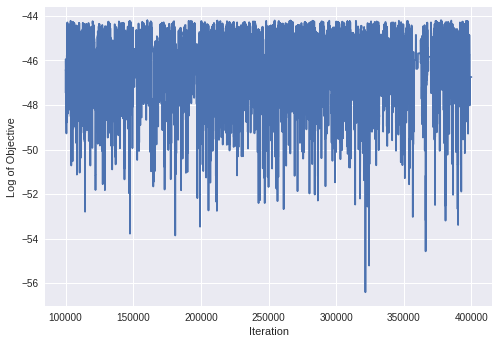

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod1_V1.png')


## Distribuciones posteriores marginales

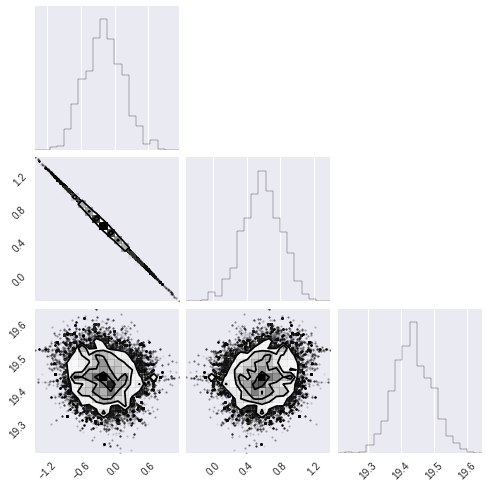

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod1_V1.png')

### X(0)

La media posterior de x(0) es  -0.19132045412225912
El límite inferior de la region de probabilidad para x(0) es  -0.819707046254638
El límite superior de la region de probabilidad para x(0) es  0.4667351020168298


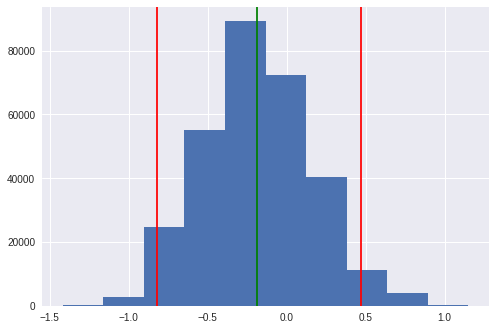

In [ ]:
#x(0)
x_0 = LorMCMC.Output[burnin:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  0.5818460436358519
El límite inferior de la region de probabilidad para y(0) es  0.13800138136988493
El límite superior de la region de probabilidad para y(0) es  1.005502631844266


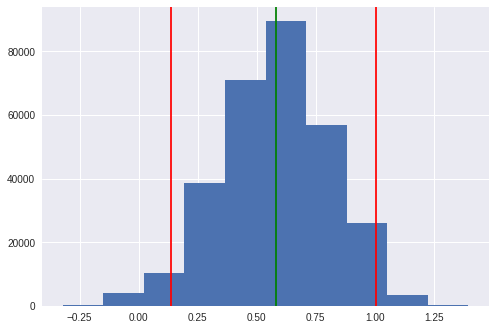

In [ ]:
#y(0)
y_0 = LorMCMC.Output[burnin:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  19.436267735511265
El límite inferior de la region de probabilidad para z(0) es  19.330867142564212
El límite superior de la region de probabilidad para z(0) es  19.54406873286262


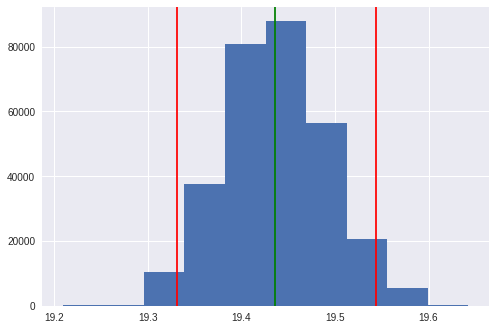

In [ ]:
#z(0)
z_0 = LorMCMC.Output[burnin:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


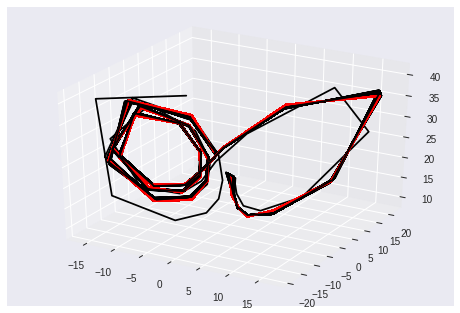

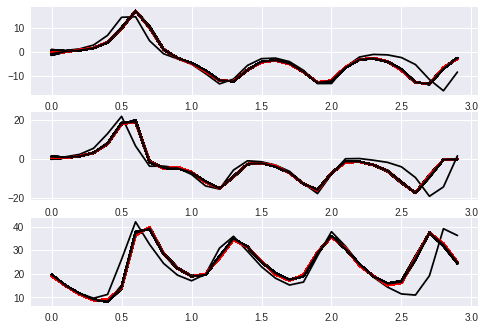

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=30, t_f=80)[:,0]

array([ -1.39749852,  -1.81442824,  -3.5112597 ,  -7.56667675,
       -14.12657285, -13.49841553,  -5.02619797,  -0.47821001,
         1.09025869,   2.30919238,   4.72445359,   9.79927625,
        15.16661754,  10.50060194,   3.18925621,   0.20572071,
        -0.80513884,  -1.74837837,  -3.78814149,  -8.49781519,
       -15.27824796, -12.30353932,  -3.53059347,   0.45880213,
         2.05666132,   3.91396046,   7.65753975,  13.23654842,
        13.03986896,   6.05139333,   1.91673656,   0.80681022,
         0.89027059,   1.72034986,   3.92920562,   9.18919159,
        16.17258236,  11.30566486,   2.3057038 ,  -1.43166281,
        -3.2488116 ,  -5.82520166, -10.32551633, -13.6891513 ,
        -9.6433231 ,  -4.30127298,  -2.27961024,  -2.43878319,
        -4.18707413,  -8.24004169])

In [ ]:
solnsx = np.zeros((5000,50))
solnsy = np.zeros((5000,50))
solnsz = np.zeros((5000,50))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,2]
    


In [ ]:
fut_data = fm.future_data()

### X

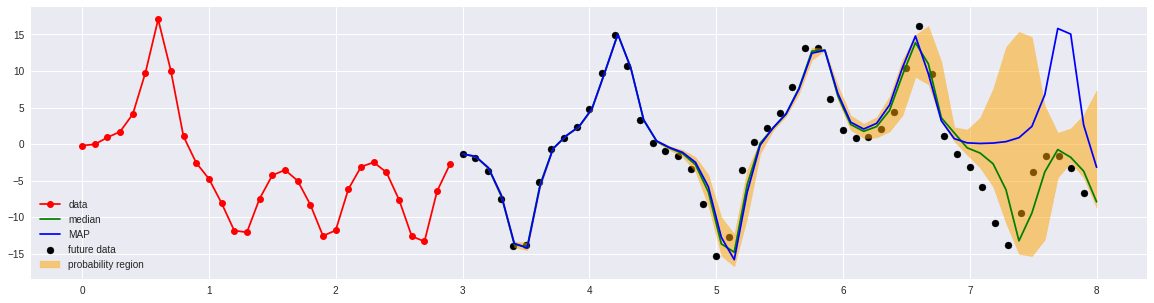

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(3,8,0.1),fut_data[30:80,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(3,8,50),median_soln,'green',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(3,8,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,0]
plt.plot(np.linspace(3,8,50),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredX1Mod1_V1.png')

### Y

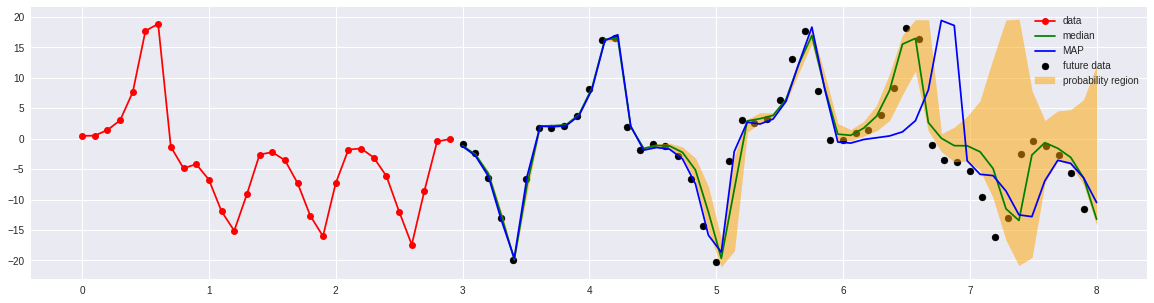

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(3,8,0.1),fut_data[30:80,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(3,8,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(3,8,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,1]
plt.plot(np.linspace(3,8,50),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod1_V1.png')

### Z

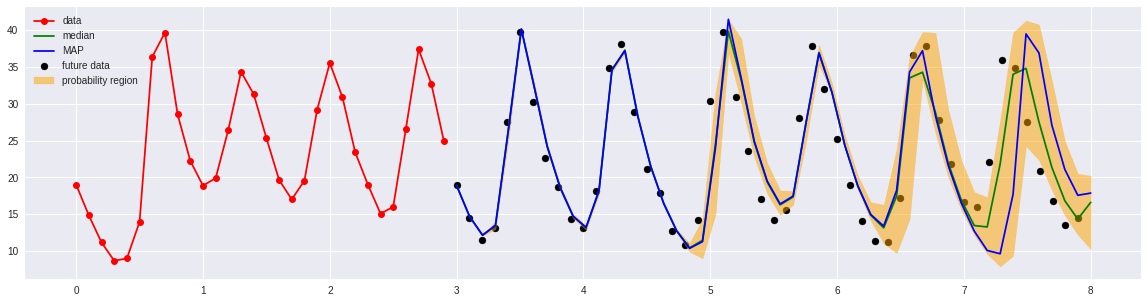

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(3,8,0.1),fut_data[30:80,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(3,8,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(3,8,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,2]
plt.plot(np.linspace(3,8,50),my_solnz,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod1_V1.png')

Es solo guardar las medias y las desviaciones estandar de cada componente en el tiempo 2.

CAMBIAR A 20-21

In [ ]:
fm.make_future_data(p=qq[0,(0,1,2)], t_i=20, t_f=21)[:,0]

array([-11.92878843])

In [ ]:
sim_x2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_x2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,0]

In [ ]:
mux2 =np.mean(sim_x2)
sigmax2 = np.std(sim_x2)

In [ ]:
sim_y2 = np.zeros((5000,1))
sim_z2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_y2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,1]
    sim_z2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,2]

In [ ]:
muy2 =np.mean(sim_y2)
sigmay2 = np.std(sim_y2)
muz2 =np.mean(sim_z2)
sigmaz2 = np.std(sim_z2)

In [ ]:
print(mux2)
print(sigmax2)

-11.962288853202416
0.04140651364582736


In [ ]:
print(muy2)
print(sigmay2)

-7.386753234023041
0.08179468707883412


In [ ]:
print(muz2)
print(sigmaz2)

35.9184672029714
0.03233989333755243


# Modelo Bayesiano 2
Empezar en 2 y 5, terminar en 10

In [ ]:
random.seed(2021)
fm = forward_mapping()
data2 = fm.make_data()[20:50,:]

In [ ]:
print(data2)

[[-11.85798118  -7.40924964  36.15307231]
 [ -6.29180538  -1.44489353  30.30984114]
 [ -3.20850138  -1.40998507  24.07807506]
 [ -2.82268909  -2.95842877  18.48442972]
 [ -3.98843542  -6.27181133  15.55757324]
 [ -7.45289701 -12.02698514  17.19763794]
 [-12.70405469 -17.30371156  27.48498337]
 [-13.07796151  -8.36278388  37.16900439]
 [ -6.83284005  -0.51219447  31.74770433]
 [ -2.35427969  -0.41440293  24.50859074]
 [ -1.28513682  -1.320187    18.31336057]
 [ -1.43953224  -2.5027119   14.82332012]
 [ -3.46834676  -6.16899283  11.7231834 ]
 [ -7.32148739 -13.24249386  14.07317025]
 [-14.13394168 -19.78357881  27.51940049]
 [-13.51948546  -6.64957882  40.09138402]
 [ -5.13563575   2.25549444  31.66076119]
 [ -0.73950202   2.14261282  23.76725203]
 [  1.43882881   2.54651961  18.28941493]
 [  2.30582349   3.65678283  14.20668717]
 [  4.99009081   7.90587732  12.92444626]
 [  9.55757138  15.65653369  18.13034061]
 [ 15.23101831  16.74074675  34.37740173]
 [ 10.5828362    2.03740484  37.73

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([-11.962288853202416,-7.386753234023041,35.9184672029714])
        cov = np.diag([0.04140651364582736,0.08179468707883412,0.03233989333755243])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag((soln.max(axis=0)**2+1)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data2-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=-12.5,high=-12.0)
        p[1] = np.random.uniform(low=-7.5,high=-7.0)
        p[2] = np.random.uniform(low=36.5,high=37.0)
        return p
    

In [ ]:
random.seed(2021)
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Thu, 02 Dec 2021, 00:42:16.
       Finish by Thu, 02 Dec 2021, 01:26.
pytwalk:       7168 iterations so far. Finish by Thu, 02 Dec 2021, 01:13.
pytwalk:      20480 iterations so far. Finish by Thu, 02 Dec 2021, 01:12.
pytwalk:      47104 iterations so far. Finish by Thu, 02 Dec 2021, 01:12.
pytwalk:     100352 iterations so far. Finish by Thu, 02 Dec 2021, 01:12.
pytwalk:     204800 iterations so far. Finish by Thu, 02 Dec 2021, 01:12.
pytwalk: finished, Thu, 02 Dec 2021, 01:13:03.


1

## Funcion objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.19326878 0.16000427 0.04883685 0.        ]
Global acceptance rate: 0.17458
AutoMaxlag: maxlag= 451.
Integrated Autocorrelation Time:   126.0, IAT/n:    42.0


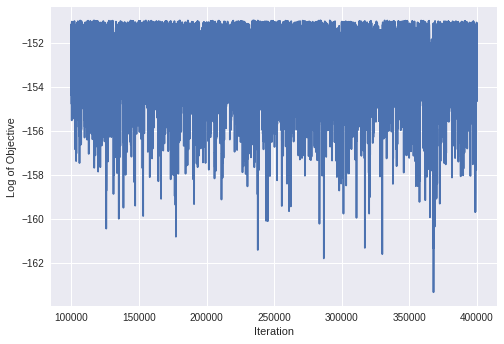

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod2_V1.png')

## Distribuciones posteriores marginales

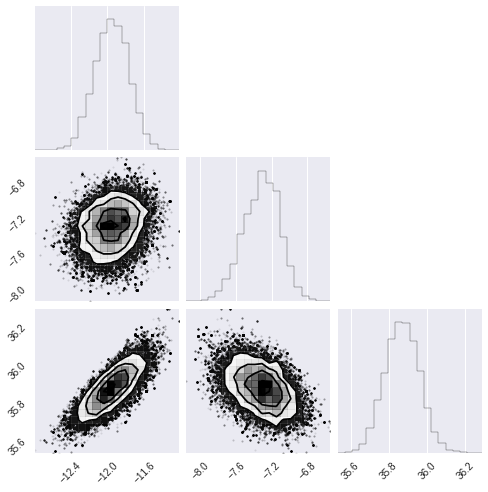

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod2_V1.png')

### X(0)

La media posterior de x(0) es  -11.95014371647984
El límite inferior de la region de probabilidad para x(0) es  -12.311891334037474
El límite superior de la region de probabilidad para x(0) es  -11.592466363861917


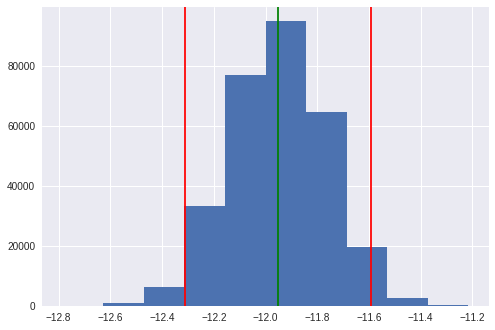

In [ ]:
#x(0)
x_0 = LorMCMC.Output[burnin:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  -7.314118346303372
El límite inferior de la region de probabilidad para y(0) es  -7.733920163473295
El límite superior de la region de probabilidad para y(0) es  -6.936039289621511


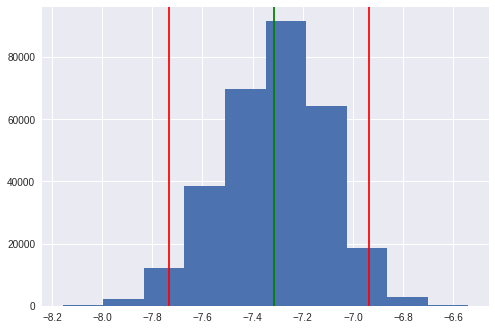

In [ ]:
#y(0)
y_0 = LorMCMC.Output[burnin:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  35.86981407381386
El límite inferior de la region de probabilidad para z(0) es  35.698786234517854
El límite superior de la region de probabilidad para z(0) es  36.04524502146465


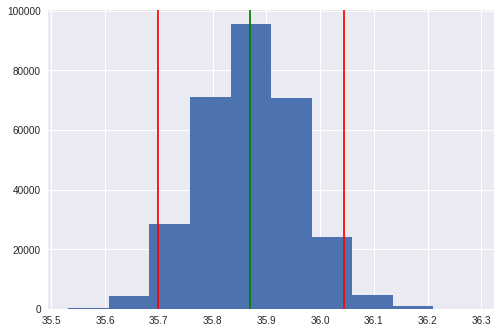

In [ ]:
#z(0)
z_0 = LorMCMC.Output[burnin:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


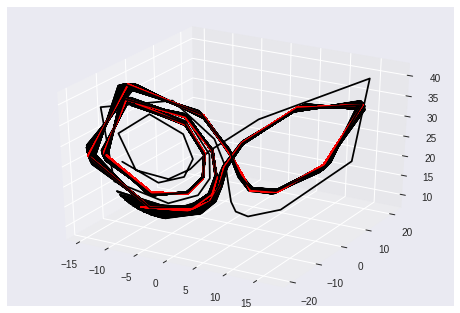

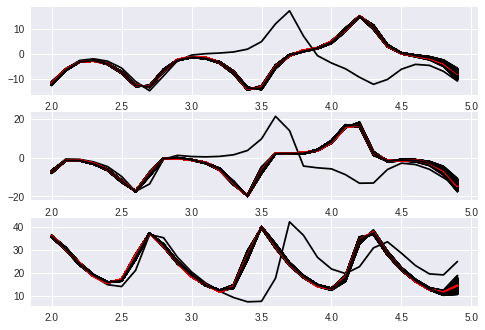

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data2[:, 0], data2[:, 1], data2[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(np.arange(2.0, 5.0, 0.1),data2[:,0],'r')
    axs[0].plot(np.arange(2.0, 5.0, 0.1),soln[:,0],'k')        
    axs[1].plot(np.arange(2.0, 5.0, 0.1),data2[:,1],'r')
    axs[1].plot(np.arange(2.0, 5.0, 0.1),soln[:,1],'k')    
    axs[2].plot(np.arange(2.0, 5.0, 0.1),data2[:,2],'r')
    axs[2].plot(np.arange(2.0, 5.0, 0.1),soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=30, t_f=80)[:,0]

array([-15.41914852, -11.65187534,  -3.25294012,   0.40609149,
         1.87663979,   3.63031607,   7.25991426,  13.06332406,
        13.56205669,   6.32071525,   1.77367225,   0.42875123,
         0.1934653 ,   0.28300496,   0.63705866,   1.60911174,
         4.28707173,  10.9851376 ,  17.8083359 ,   8.44269359,
        -0.47907072,  -3.81964355,  -6.11926508,  -9.27232642,
       -11.8541965 , -10.22556063,  -6.50137437,  -4.66980522,
        -5.09893229,  -7.43884535, -10.98273041, -12.00762449,
        -8.35982115,  -4.9961944 ,  -4.17647471,  -5.45624658,
        -8.65207118, -12.2838978 , -11.25967003,  -6.60185198,
        -3.93386439,  -3.82482555,  -5.69017034,  -9.57000518,
       -13.12124677, -10.44435658,  -5.32367426,  -3.06176111,
        -3.21158316,  -5.20139931])

In [ ]:
solnsx = np.zeros((5000,50))
solnsy = np.zeros((5000,50))
solnsz = np.zeros((5000,50))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,2]
    


In [ ]:
fut_data = fm.future_data()

### X

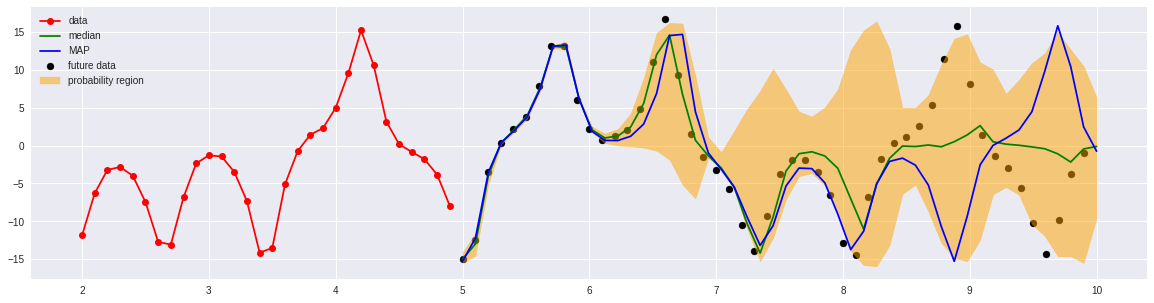

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(2.0, 5.0, 0.1),data2[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(5,10,0.1),fut_data[50:100,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(5,10,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(5,10,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,0]
plt.plot(np.linspace(5,10,50),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredXMod2_V1.png')

### Y

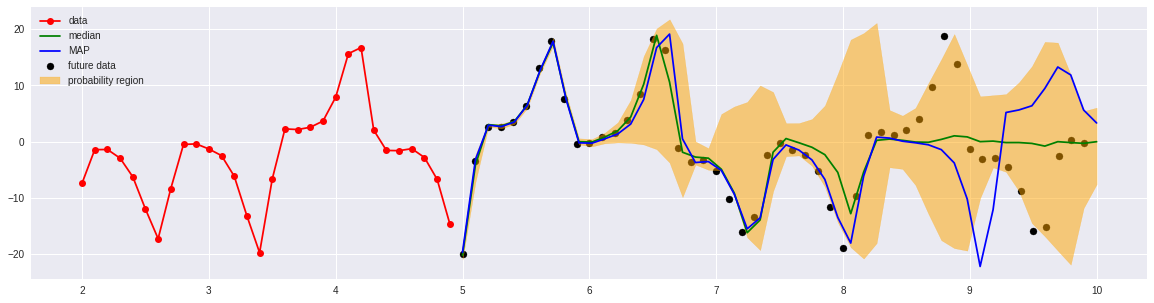

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(2.0, 5.0, 0.1),data2[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(5,10,0.1),fut_data[50:100,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(5,10,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(5,10,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,1]
plt.plot(np.linspace(5,10,50),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod2_V1.png')

### Z

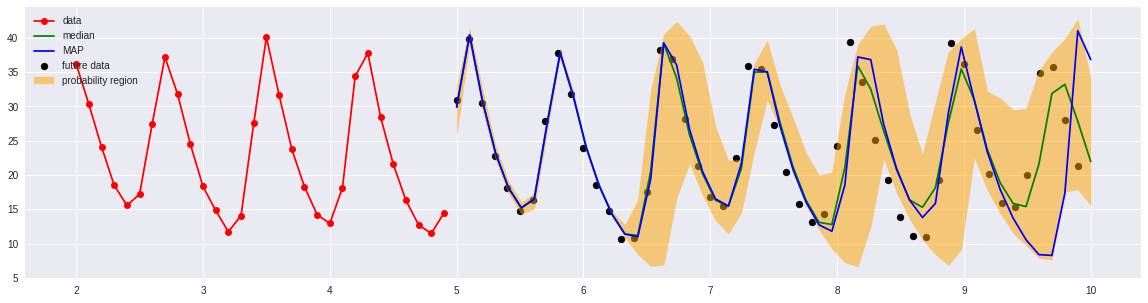

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(2.0, 5.0, 0.1),data2[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(5,10,0.1),fut_data[50:100,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(5,10,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(5,10,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,2]
plt.plot(np.linspace(5,10,50),my_solnz,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod2_V1.png')

In [ ]:
sim_x2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_x2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,0]

In [ ]:
mux2 =np.mean(sim_x2)
sigmax2 = np.std(sim_x2)

In [ ]:
sim_y2 = np.zeros((5000,1))
sim_z2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_y2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,1]
    sim_z2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=20, t_f=21)[:,2]

In [ ]:
muy2 =np.mean(sim_y2)
sigmay2 = np.std(sim_y2)
muz2 =np.mean(sim_z2)
sigmaz2 = np.std(sim_z2)

In [ ]:
print(mux2)
print(sigmax2)

4.701814892799641
0.09954485151608083


In [ ]:
print(muy2)
print(sigmay2)

8.198381537278564
0.16520761842630657


In [ ]:
print(muz2)
print(sigmaz2)

12.928721051390646
0.1169402660172838


# Modelo Bayesiano 3
Datos entre 4 y 7, terminar en 12

In [ ]:
random.seed(2021)
fm = forward_mapping()
data3 = fm.make_data()[40:70,:]

In [ ]:
print(data3)

[[  4.75828956   8.12314982  12.9203963 ]
 [  9.57936796  16.26315683  17.94162541]
 [ 14.74402295  16.55947255  35.0860145 ]
 [ 10.71818446   1.51922723  37.76548037]
 [  3.41618448  -1.98468783  29.14453452]
 [  0.22675823  -1.43717702  21.15844682]
 [ -0.70154444  -1.21743224  16.44470409]
 [ -1.54531078  -2.80514531  13.00373123]
 [ -3.7131137   -6.50478325  11.74441853]
 [ -8.23892083 -14.66154953  14.54857775]
 [-15.28786754 -20.03368548  30.5238481 ]
 [-12.46765993  -3.60614404  40.43643486]
 [ -3.70235562   3.09597697  30.28992053]
 [  0.63597113   2.9254236   23.15288304]
 [  2.58888154   3.38666584  18.04809227]
 [  4.00808422   6.23550682  15.09172238]
 [  7.96480094  12.48500421  16.77481833]
 [ 13.35396255  17.77820296  28.02188973]
 [ 12.95914755   7.60425157  37.97996085]
 [  6.10628812  -0.12496227  31.38781392]
 [  2.13451693  -0.06406978  24.16481603]
 [  0.73777833   0.48330173  18.79660566]
 [  1.24653428   1.55830163  14.3145801 ]
 [  2.04651244   3.56985998  11.18

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([4.701814892799641,8.198381537278564,12.928721051390646])
        cov = np.diag([0.09954485151608083,0.16520761842630657,0.1169402660172838])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag((soln.max(axis=0)**2+1)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data3-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=4.5,high=4.8)
        p[1] = np.random.uniform(low=8.0,high=8.3)
        p[2] = np.random.uniform(low=12.8,high=13.1)
        return p
    

In [ ]:
random.seed(2021)
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Thu, 02 Dec 2021, 02:05:17.
       Finish by Thu, 02 Dec 2021, 03:13.
pytwalk:       6144 iterations so far. Finish by Thu, 02 Dec 2021, 02:38.
pytwalk:      18432 iterations so far. Finish by Thu, 02 Dec 2021, 02:38.
pytwalk:      43008 iterations so far. Finish by Thu, 02 Dec 2021, 02:38.
pytwalk:      91136 iterations so far. Finish by Thu, 02 Dec 2021, 02:38.
pytwalk:     187392 iterations so far. Finish by Thu, 02 Dec 2021, 02:38.
pytwalk:     379904 iterations so far. Finish in approx. 1 min and 40 sec.
pytwalk: finished, Thu, 02 Dec 2021, 02:38:45.


1

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.14764798 0.14449417 0.02698221 0.        ]
Global acceptance rate: 0.14410
AutoMaxlag: maxlag= 828.
Integrated Autocorrelation Time:   171.9, IAT/n:    57.3


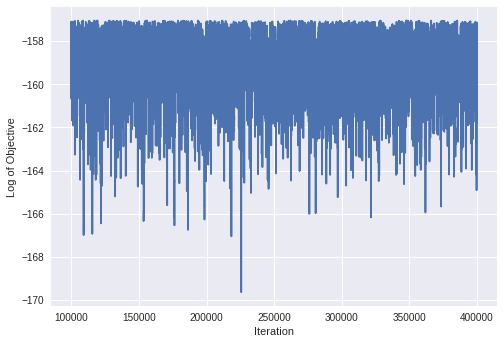

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod3_V1.png')

## Distribuciones posteriores marginales

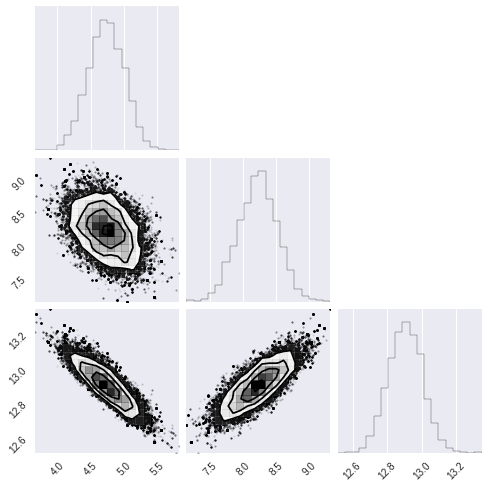

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod3_V1.png')

### X(0)

La media posterior de x(0) es  4.733789999781542
El límite inferior de la region de probabilidad para x(0) es  4.199890888362345
El límite superior de la region de probabilidad para x(0) es  5.249205808405015


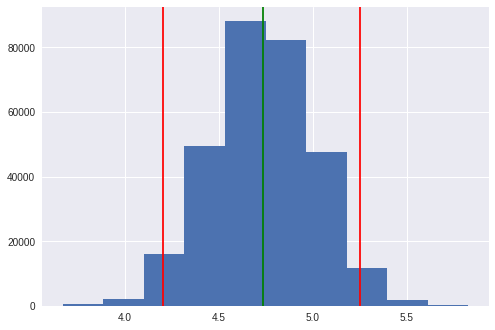

In [ ]:
#x(0)
x_0 = LorMCMC.Output[burnin:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  8.223465495390029
El límite inferior de la region de probabilidad para y(0) es  7.650420987624306
El límite superior de la region de probabilidad para y(0) es  8.780764727341653


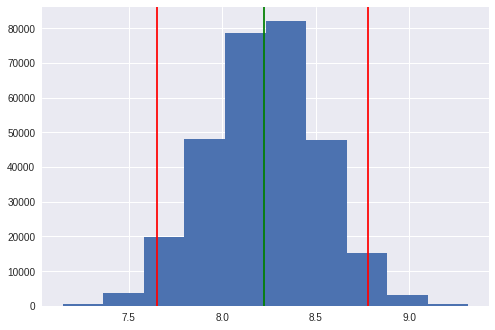

In [ ]:
#y(0)
y_0 = LorMCMC.Output[burnin:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  12.905523608545204
El límite inferior de la region de probabilidad para z(0) es  12.715639931481874
El límite superior de la region de probabilidad para z(0) es  13.09835861747803


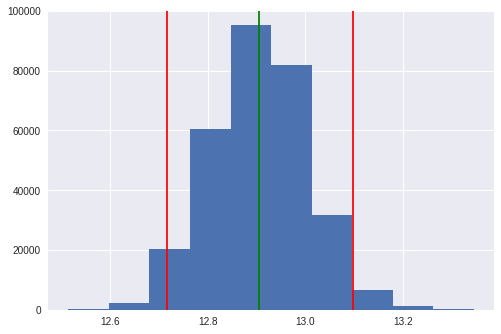

In [ ]:
#z(0)
z_0 = LorMCMC.Output[burnin:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


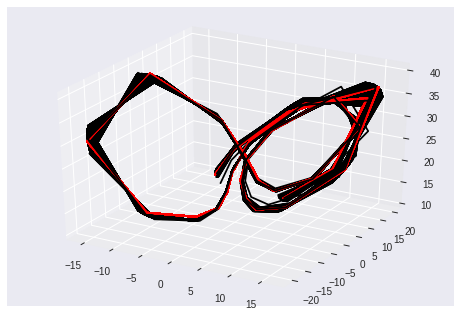

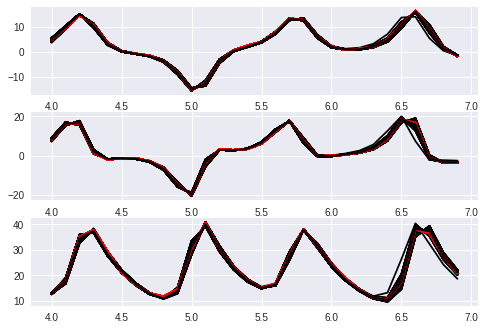

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data3[:, 0], data3[:, 1], data3[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(np.arange(4.0, 7.0, 0.1),data3[:,0],'r')
    axs[0].plot(np.arange(4.0, 7.0, 0.1),soln[:,0],'k')        
    axs[1].plot(np.arange(4.0, 7.0, 0.1),data3[:,1],'r')
    axs[1].plot(np.arange(4.0, 7.0, 0.1),soln[:,1],'k')    
    axs[2].plot(np.arange(4.0, 7.0, 0.1),data3[:,2],'r')
    axs[2].plot(np.arange(4.0, 7.0, 0.1),soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=30, t_f=80)[:,0]

array([ -3.12393058,  -5.8391435 , -10.74197755, -14.13243213,
        -9.20429016,  -3.59760271,  -1.57700106,  -1.52415255,
        -2.65491536,  -5.60649793, -11.58033593, -15.40902405,
        -8.17742906,  -1.70947579,   0.62167467,   1.75827296,
         3.52550293,   7.41241859,  13.69200966,  13.59281084,
         5.56132269,   0.97935458,  -0.50335283,  -1.33680898,
        -2.81948994,  -6.31378572, -12.99485959, -15.0983524 ,
        -6.38865142,  -0.58869806,   1.49126557,   3.01157382,
         5.84067773,  11.07686715,  14.47695244,   8.82129706,
         3.0201885 ,   0.97281756,   0.67508424,   1.10285675,
         2.40852849,   5.75058469,  12.76715746,  16.02438809,
         6.53307784,  -0.06063226,  -2.526726  ,  -4.55407374,
        -8.08032549, -12.65345216])

In [ ]:
solnsx = np.zeros((5000,50))
solnsy = np.zeros((5000,50))
solnsz = np.zeros((5000,50))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=30, t_f=80)[:,2]
    


In [ ]:
fut_data = fm.future_data()

### X

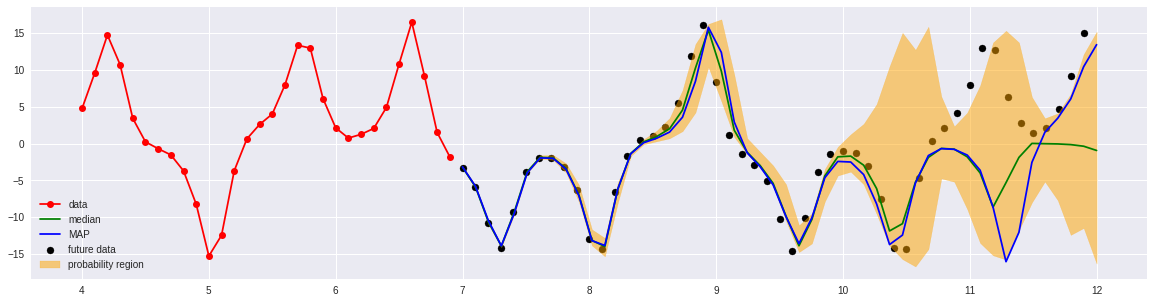

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 7.0, 0.1),data3[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(7,12,0.1),fut_data[70:120,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(7,12,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(7,12,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,0]
plt.plot(np.linspace(7,12,50),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredXMod3_V1.png')

### Y

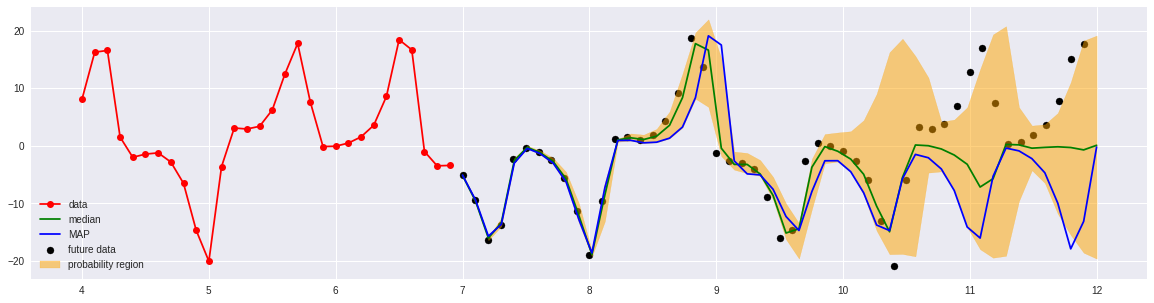

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 7.0, 0.1),data3[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(7,12,0.1),fut_data[70:120,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(7,12,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(7,12,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,1]
plt.plot(np.linspace(7,12,50),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod3_V1.png')

### Z

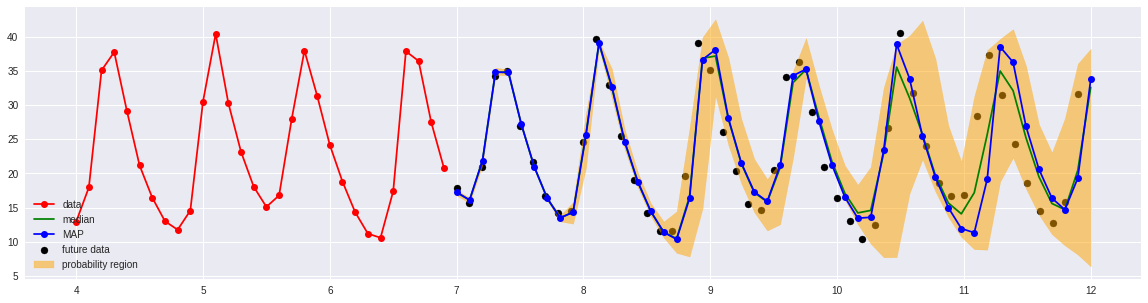

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 7.0, 0.1),data3[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(7,12,0.1),fut_data[70:120,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(7,12,50),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(7,12,50),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=30, t_f=80)[:,2]
plt.plot(np.linspace(7,12,50),my_solnz,'b-o',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod3_V1.png')